## 1. Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [5]:
pd.set_option("display.max_row", 800)
pd.set_option("display.max_column", 500)

## 2. Load Data

In [6]:
df = pd.read_csv(r"C:\Users\nikhi\Downloads\Loan-Repayment-Prediction-master\loan_data.csv")

In [9]:
df.shape

(9578, 14)

## 3. Understanding the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [16]:
#df.columns

In [15]:
df = df.rename(columns={'credit.policy' :'credit_policy' , 'int.rate': 'int_rate', 'log.annual.inc' :'log_annual_inc',
                        'days.with.cr.line':'days_with_cr_line', 'revol.bal':'revol_bal', 'revol.util':'revol_util',
                        'inq.last.6mths':'inq_last_6mths', 'delinq.2yrs':'delinq_2yrs', 'pub.rec':'pub_rec', 
                        'not.fully.paid':'not_fully_paid'})
df.head(1)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


In [18]:
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [19]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [23]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical Columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical Columns: \n",cat_col)

Numerical Columns: 
 Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')
Categorical Columns: 
 Index(['purpose'], dtype='object')


# 4. Data Pre-processing

In [24]:
#lets do OneHotEncoding for the column "purpose"  as the model would expecting numeric features

df = pd.get_dummies(prefix='purpose', data=df ,columns=['purpose'])

In [25]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical Columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical Columns: \n",cat_col)

Numerical Columns: 
 Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')
Categorical Columns: 
 Index([], dtype='object')


In [28]:
print(df.isnull().sum())
print(df.shape)

credit_policy                 0
int_rate                      0
installment                   0
log_annual_inc                0
dti                           0
fico                          0
days_with_cr_line             0
revol_bal                     0
revol_util                    0
inq_last_6mths                0
delinq_2yrs                   0
pub_rec                       0
not_fully_paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64
(9578, 20)


# 5. Exploratory Data analysis

<function matplotlib.pyplot.show(*args, **kw)>

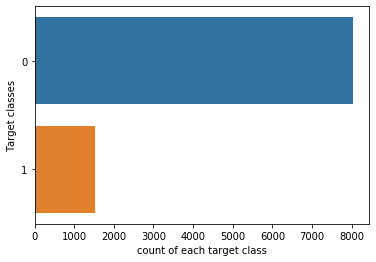

In [29]:
#Check the distribution of y variable to see if its a case of unbalance class

sns.countplot(y=df['not_fully_paid'] , data=df)
plt.xlabel("count of each target class")
plt.ylabel("Target classes")
plt.show

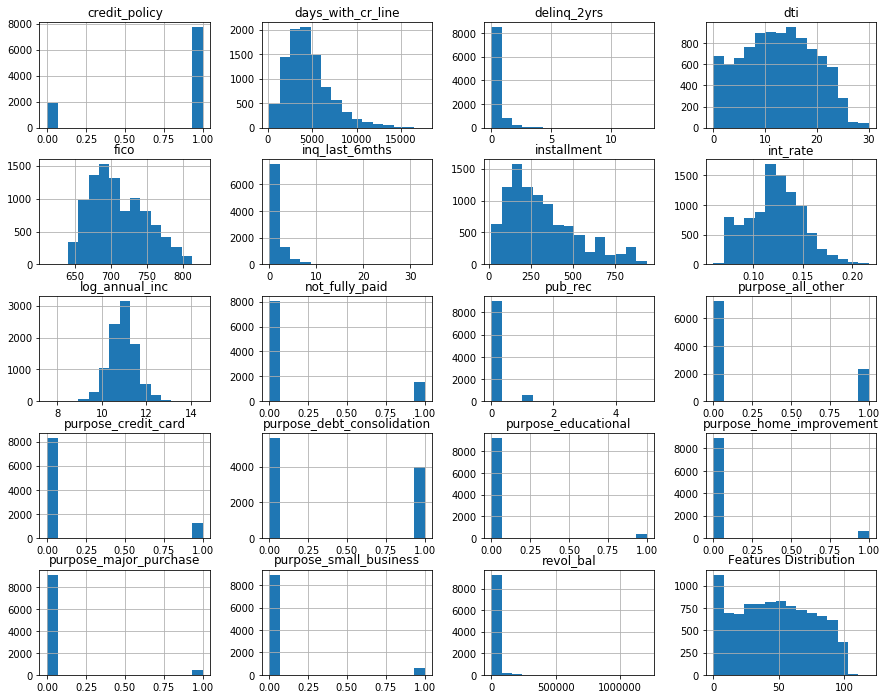

In [31]:
# Check the distribution of all the features

df.hist(figsize=(15,12),bins=15)
plt.title("Features Distribution")
plt.show()

## 6. Model Building

In [32]:
# Train_test_split
X = df.drop(['not_fully_paid'], axis=1)
y = df['not_fully_paid']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=500)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6704, 19), (2874, 19), (6704,), (2874,))

## Decision tree with criterion = gini

In [35]:
clf = DecisionTreeClassifier(criterion='gini' , random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [52]:
print("confusin matrix: \n", confusion_matrix(y_test,y_pred))
print("\n acurracy score: \n", accuracy_score(y_test,y_pred))
print("\n classification report: \n", classification_report(y_test,y_pred))

confusin matrix: 
 [[2018  374]
 [ 369  113]]

 acurracy score: 
 0.7414752957550452

 classification report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2392
           1       0.23      0.23      0.23       482

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.74      0.74      2874



## Decision tree with criterion = entropy

In [53]:
clf = DecisionTreeClassifier(criterion='entropy' , random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("confusin matrix: \n", confusion_matrix(y_test,y_pred))
print("\n acurracy score: \n", accuracy_score(y_test,y_pred))
print("\n classification report: \n", classification_report(y_test,y_pred))

confusin matrix: 
 [[2034  358]
 [ 396   86]]

 acurracy score: 
 0.7376478775226165

 classification report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2392
           1       0.19      0.18      0.19       482

    accuracy                           0.74      2874
   macro avg       0.52      0.51      0.51      2874
weighted avg       0.73      0.74      0.73      2874



## Handle class Imbalance

**The class 1 is very less ,hence we need to handle class imbalance by oversampling**

In [55]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros,y_ros = ros.fit_sample(X,y)

y_ros.value_counts()
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3 , random_state=500)

In [56]:
y_ros.value_counts()

1    8045
0    8045
Name: not_fully_paid, dtype: int64

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11263, 19), (4827, 19), (11263,), (4827,))

## Decision tree with criterion = gini

In [58]:
clf = DecisionTreeClassifier(criterion='gini' , random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("confusin matrix: \n", confusion_matrix(y_test,y_pred))
print("\n acurracy score: \n", accuracy_score(y_test,y_pred))
print("\n classification report: \n", classification_report(y_test,y_pred))

confusin matrix: 
 [[1979  509]
 [  42 2297]]

 acurracy score: 
 0.8858504246944272

 classification report: 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      2488
           1       0.82      0.98      0.89      2339

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.89      4827
weighted avg       0.90      0.89      0.89      4827



## Decision tree with criterion = entropy

In [59]:
clf = DecisionTreeClassifier(criterion='entropy' , random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("confusin matrix: \n", confusion_matrix(y_test,y_pred))
print("\n acurracy score: \n", accuracy_score(y_test,y_pred))
print("\n classification report: \n", classification_report(y_test,y_pred))

confusin matrix: 
 [[1983  505]
 [  41 2298]]

 acurracy score: 
 0.886886264760721

 classification report: 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      2488
           1       0.82      0.98      0.89      2339

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.89      4827
weighted avg       0.90      0.89      0.89      4827



## Hyper-Parameters with Grid Search CV

In [60]:
dtclassifier = DecisionTreeClassifier()

#defining parameter range
param_grid = {'criterion' : ['gini','entropy'],
             'max_depth' : [10,15,20,25,30,35,40]}

grid = GridSearchCV(dtclassifier, param_grid , refit=True, verbose=3)

#fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.647, total=   0.1s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.690, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.688, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.679, total=   0.1s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.682, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.747, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.776, total=   0.1s
[CV] c

[CV] ..... criterion=entropy, max_depth=30, score=0.853, total=   0.1s
[CV] criterion=entropy, max_depth=30 .................................
[CV] ..... criterion=entropy, max_depth=30, score=0.874, total=   0.1s
[CV] criterion=entropy, max_depth=35 .................................
[CV] ..... criterion=entropy, max_depth=35, score=0.860, total=   0.1s
[CV] criterion=entropy, max_depth=35 .................................
[CV] ..... criterion=entropy, max_depth=35, score=0.860, total=   0.1s
[CV] criterion=entropy, max_depth=35 .................................
[CV] ..... criterion=entropy, max_depth=35, score=0.876, total=   0.1s
[CV] criterion=entropy, max_depth=35 .................................
[CV] ..... criterion=entropy, max_depth=35, score=0.863, total=   0.1s
[CV] criterion=entropy, max_depth=35 .................................
[CV] ..... criterion=entropy, max_depth=35, score=0.870, total=   0.1s
[CV] criterion=entropy, max_depth=40 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    5.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [61]:
# Best parameter after hypertunning
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 30}


In [63]:
# Model parameter
print(grid.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [64]:
# Prediciton using best parameters
grid_prediction = grid.predict(X_test)

print("confusin matrix: \n", confusion_matrix(y_test,grid_prediction))
print("\n acurracy score: \n", accuracy_score(y_test,grid_prediction))
print("\n classification report: \n", classification_report(y_test,grid_prediction))

confusin matrix: 
 [[1965  523]
 [  42 2297]]

 acurracy score: 
 0.8829500725088046

 classification report: 
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      2488
           1       0.81      0.98      0.89      2339

    accuracy                           0.88      4827
   macro avg       0.90      0.89      0.88      4827
weighted avg       0.90      0.88      0.88      4827

